In [1]:
!pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable


In [58]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm

In [3]:
mode = 'jupyter' #colab
render = 'plot' #image

In [4]:
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

if mode == 'colab':
    import cufflinks as cf
    cf.go_offline()
    init_notebook_mode(connected=False)

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Config for Colab
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [5]:
if render == 'image':
    import plotly.io as pio
    pio.renderers.default = 'png'

# Regression Analysis

Regression Analysis is a common method of prediction. It is used when we have a causal relationship betweeen variables. It is also used with other techniques like factor analysis. 

For example, the amount of money a person earns is dependent on the amount of education a person receives. It is a one-way relationship because earning more money does not mean that a person will spend the money to receive more education. 

Here, we have a one-way relationship between education and earning where the earning changes based on education. Therefore, we consider 'earning' to be the **dependent variable** and education to be the **independent variable**.

Regression analysis is a method by which we predict the outcome of dependent variable based on the change in input of the independent variables.

One of the most popular technique for regression analysis is - **Linear Regression**.

## Linear Regression

A linear regression is a **linear approximation** of a causal relationship between two or more variables. However, it must be noted the relationship must be linear i.e. if the value of one independent variables changes, the value of the dependent variable changes linearly.

For example:

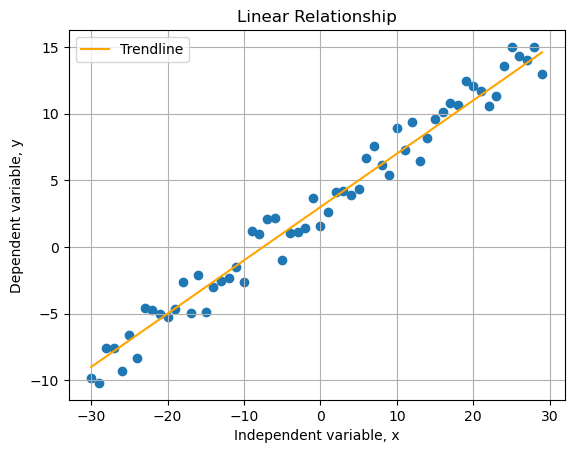

In [35]:
slope = 0.4
intercept = 3
x = np.arange(-30, 30)
delta = np.random.uniform(-2, 2, 60)
y = slope*x + intercept + delta

plt.figure()
plt.title("Linear Relationship")
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, label='Trendline', color='orange')
plt.grid()
plt.xlabel("Independent variable, x")
plt.ylabel("Dependent variable, y")
plt.legend()
plt.show()

In the above example, we have a dataset where the value of 'y' changes based on the change in 'x'. The relationship is linear because we can draw a straight line through all the data points to fit most of the data points in a straight line.

However, if we have the following dataset:

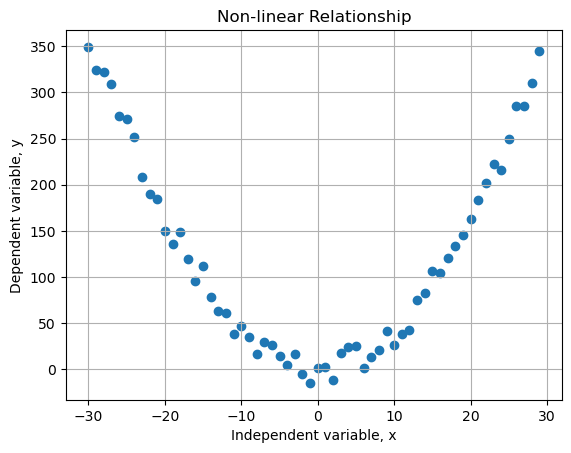

In [45]:
delta = np.random.uniform(-20, 20, 60)
y = slope * np.square(x) + intercept + delta

plt.figure()
plt.title("Non-linear Relationship")
plt.scatter(x, y)
plt.grid()
plt.xlabel("Independent variable, x")
plt.ylabel("Dependent variable, y")
plt.show()

In the above dataset, we cannot draw a single straight line that fits most of the data points. So, the relationship between the variables is not linear.

**Regression models are very important as they are useful to make inferences and predictions.**

## Process of Regression Analysis

1. We first collect a sample data and analyze it.

2. We create a model that works for the dataset. The model can either be a linear regression model or some other model that explains the relationship between the data.

3. We make predictions for the whole population using the model. That is, based on the sample data we make prediction about the output of the dependent variable for some value of input independent variable that does not exist in our dataset.

**The dependent (predicted output) variable is denoted by 'Y' and the dependent (input) variables are denoted by '$x_1, x_2,...,x_n$'. The variable 'Y' is known as prediction and the variables $x_i$ are known as predictors.**


## Linear Regression Model

The equation for a linear regression model is as follows:

\begin{equation}
Y = F(x_1,x_2,...,x_n)
\end{equation}

Here,
- 'F' is the function that we call 'linear regression model' since the function is a linear approximation of the output 'Y" for a set of inputs 'X'.

There are many types of linear regression model. For example:

- Simple linear regression
- Multiple linear regression

In this task we will focus on 'Simple linear regression' models.

## Simple Linear Regression

The equation for simple linear regression model is as follows:

\begin{equation}
y = \beta_0 + \beta_1 x_1 + \epsilon
\end{equation}

Here,
- $x_1$ is the predictor

- $\beta_0$ is the coefficient that denotes the minimum value of 'y'. That is, if $x_1=0$ the variable of 'y' will not be zero but some minimum output depending on the dataset. If the minimum value of the output can be zero, we can set this coefficient to zero.

- $\beta_1$ is the coefficient that quantifies the effect of independent variable $x_1$ on the dependent variable 'y'.

- $\epsilon$ is the coefficient that denotes the error of estimation. It is the actual difference between the observed output that the regression predicted and the actual output.

For our example of earning and education:

- $\beta_0$ can be considered the minimum earning a person can have even if they have no education.

- $\beta_1$ can be the affect that increase in education has on the amount of earning. For example, in US each yearof education can increase the annual earning by $\$$ 3,000-5000.

- $\epsilon$ is the error between the predicted income of a person and the actual income of that person. On average the error is zero because if we predict higher income for one person the model may also predict a lower income for a different person.

**The above equation is for population data.**

For sample data we use the following equation:

\begin{equation}
\hat{y} = b_0 + b_1 x_1
\end{equation}

- $b_0$ is the coefficient that denotes the minimum value of '$\hat{y}$' for sample data.

- $b_1$ is the coefficient that quantifies the effect of independent variable $x_1$ on the dependent variable '$\hat{y}$' for the sample data.

### Correlation VS Regression

Correlation does not imply causation. Correlation shows the degree of relationship between two variables but it does not show how the change in one variable effects the other. However, regression is based on causality. It does not show the degree of relationship between two variables. Rather it shows how the change in one variable affects the other.

For example, correlation between two variables 'x' and 'y'

\begin{equation}
\rho(x,y) = \rho(y,x)
\end{equation}

Here, the correlation between 'x' and 'y' is the same as that of the correlation between 'y' and 'x'. Therefore, correlation does not provide the information related to causality.

Moreover, correlation has a single value i.e. it is a point in the graph where 'x' represents one variable and 'y' represents another variable. However, regression is a straight line in the graph that shows the relationship between the two variables.

Correlation: [7288.39879972]


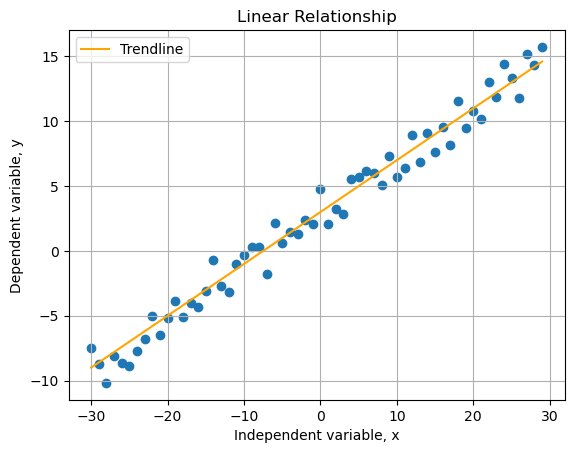

In [46]:
slope = 0.4
intercept = 3
x = np.arange(-30, 30)
delta = np.random.uniform(-2, 2, 60)
y = slope*x + intercept + delta

print(f"Correlation: {np.correlate(x, y)}")

plt.figure()
plt.title("Linear Relationship")
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, label='Trendline', color='orange')
plt.grid()
plt.xlabel("Independent variable, x")
plt.ylabel("Dependent variable, y")
plt.legend()
plt.show()

We can see from the above example that the value of correlation provides with the degree of relationship whereas, the regression is a line that denotes that if 'x' increases, 'y' also increases linearly.

### Regression Line

A regression line is a straight line that best fits the data points of a linear regression model. In the above example, the line 'Trendline' is the regression line as it best fits all the data points in the dataset.

Correlation: [7073.55876652]


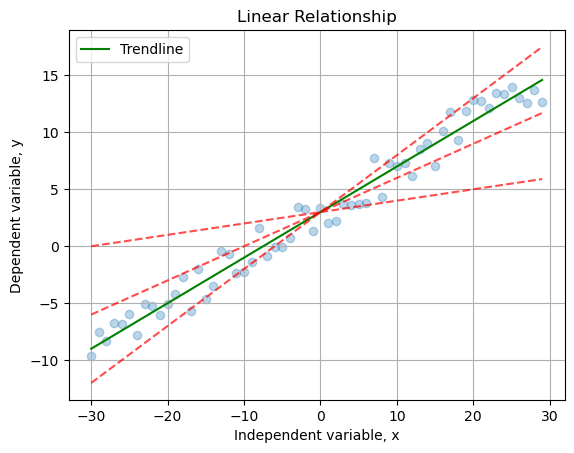

In [56]:
slope = 0.4
intercept = 3
x = np.arange(-30, 30)
delta = np.random.uniform(-2, 2, 60)
y = slope*x + intercept + delta

print(f"Correlation: {np.correlate(x, y)}")

plt.figure()
plt.title("Linear Relationship")
plt.scatter(x, y, alpha=0.3)
plt.plot(x, slope*x + intercept, label='Trendline', color='green')

for s in np.arange(0.1, 0.7, 0.2):
    if s != slope:
        plt.plot(x, s*x + intercept, 'r--', alpha=0.7)
plt.grid()
plt.xlabel("Independent variable, x")
plt.ylabel("Dependent variable, y")
plt.legend()
plt.show()

From the above graph we can see that we can draw many straight line that passes through the data points but one line (Trendline) fits most of the data points. This line is considered to be the regression line.

## Example of simple linear regression

Suppose we have a dataset that contains the SAT score of some students and the GPA that they obtained at the university. We want to predict the GPA of a student based on their SAT score.

In [61]:
df = pd.read_csv('sat_gpa.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Step 1 - Check if the data has a linear relationship

First we will plot our dataset and check if the data infact has a linear relationship. If it doesn't, there is no use applying linear regression to the dataset.

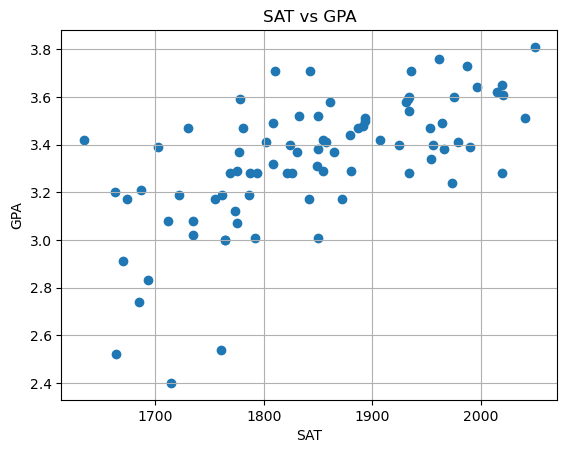

In [62]:
plt.figure()
plt.title("SAT vs GPA")
plt.scatter(df['SAT'], df['GPA'])
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.grid()
plt.show()

We can see that overall, the data does have a linear relationship. If the SAT score is higher, then the student is expected to have a high GPA. Therefore, we can use linear regression for prediction.

### Step 2 - Create the model

To create the regression model we will consider the SAT score as independent variable and the GPA as dependent variable as we are trying to predict the GPA of a student based on their SAT score. So, our equation becomes:

\begin{equation}
\hat{y_{GPA}} = b_0 + b_1 x_{SAT}
\end{equation}

Now, if we can find the value of $b_0$ and $b_1$ for the regression line, we can predict the GPA of a student based on SAT score not provided in our sample data.

In our regression, $x_1$ is the independent variable. However, the coefficient $b_0$ does not have any corresponding $x_0$. Therefore, for simple linear regression we assume $x_0$ to be '1' for independent variables.

In [63]:
x1 = df['SAT']
y = df['GPA']

x = sm.add_constant(x1) # Adding constant '1' for all x1 data points

results = sm.OLS(y, x).fit() # Perform linear regression to calculate the value of b0 and b1 to create the regression line
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        14:54:28   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3 - View the regression line

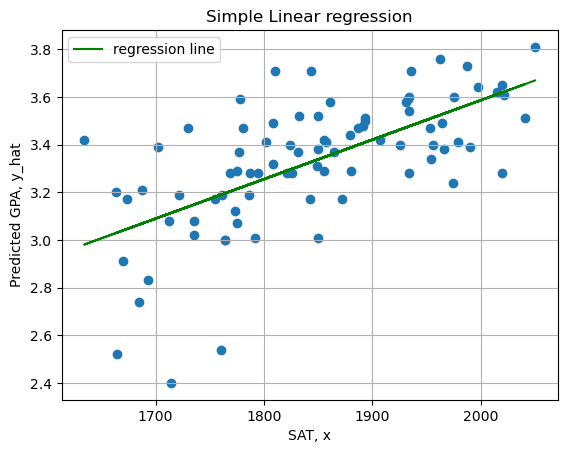

In [71]:
b0 = results.params[0]
b1 = results.params[1]

plt.figure()
plt.title("Simple Linear regression")
plt.scatter(df['SAT'], df['GPA'])
plt.plot(df['SAT'], b0 + b1 * df['SAT'], label='regression line', color='green')
plt.xlabel("SAT, x")
plt.ylabel("Predicted GPA, y_hat")
plt.grid()
plt.legend()
plt.show()

We plotted the regression line above using the coefficients. This is the best-fit line for our sample dataset. Using the coefficients we get the predicted GPA of each student based on their SAT score.

### Step 4 - Make a prediction

Suppose, we have the SAT score of a student which 1921. We want to predict the GPA of the student. We can predict the value as follows:

\begin{equation}
\hat{y_{GPA}} = b_0 + b_1 x_{SAT} \\
\hat{y_{GPA}} = 0.275 + 0.0017 * 1921 = 3.456
\end{equation}

In [72]:
input_sat = 1921
predicted_gpa = results.params[0] + (results.params[1] * input_sat)
print(f"The predicted GPA for a SAT score {input_sat} is {predicted_gpa}")

The predicted GPA for a SAT score 1921 is 3.4556170438885756


## Different parameters of linear regression

We obtained the following information from the model we created above:

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        15:04:30   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Co-efficients

The section 'coef' in the above summary contains two rows - 'const' which is $b_0$ and 'SAT' which is $b_1$. The rows contains 5 columns:

1. coeff: This column contains the value of the coefficients.

2. std err: This column contains the standard error for each of the coefficient. Lower error means that the model explains the sample dataset better and provides a better estimate of the output. 

3. t: This column contains the T-score for each row.

4. P>\[t\]: This column contains the P-value for each row.


Since each row has a T-score and a P-value, it means that each coefficient has a hypothesis. The hypothesis for each coefficient is as follows:

1. $b_0$: The coefficient is equal to zero

2. $b_1$: The coefficient is equal to zero

The hypothesis checks if the coefficient is equal to zero. If $b_0$ is equal to zero, it means that the intercept of the straight line is equal to zero. In that case, our regression line would like this:

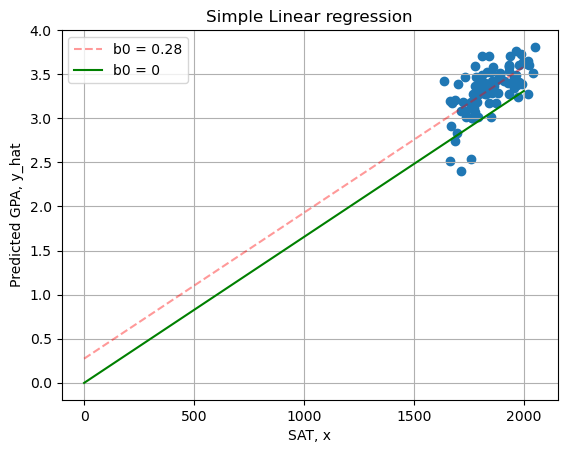

In [83]:
b0 = results.params[0]
b1 = results.params[1]

plt.figure()
plt.title("Simple Linear regression")
plt.scatter(df['SAT'], df['GPA'])
plt.plot(np.arange(-1, 2000), b0 + b1 * np.arange(-1, 2000), 'r--', label=f'b0 = {b0:.2f}', alpha=0.4)
plt.plot(np.arange(-1, 2000), 0 + b1 * np.arange(-1, 2000), label='b0 = 0', color='green')
plt.xlabel("SAT, x")
plt.ylabel("Predicted GPA, y_hat")
plt.grid()
plt.legend()
plt.show()

We can see that after setting $b_0$ equal to zero, our regression line has shifted downwards. It means that the intercept of y-axis is zero and the line passes through the origin. 

Similarly, if the value of $b_1$ is zero then the line becomes parallel to x-axis. It means that even if our 'x' changes, the y value does not change. That indicates that both the variables have no relationship. 


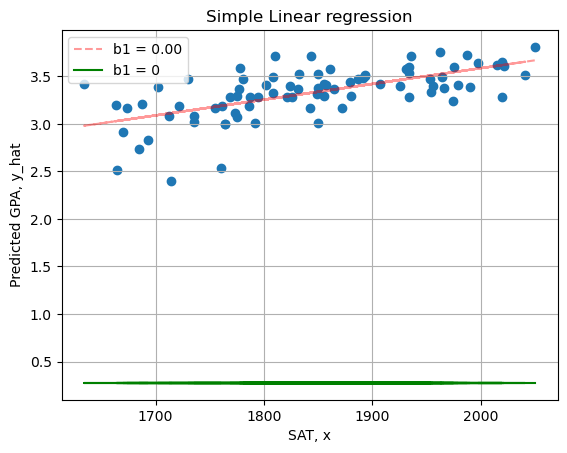

In [85]:
b0 = results.params[0]
b1 = results.params[1]

plt.figure()
plt.title("Simple Linear regression")
plt.scatter(df['SAT'], df['GPA'])
plt.plot(df['SAT'], b0 + b1 * df['SAT'], 'r--', label=f'b1 = {b1:.2f}', alpha=0.4)
plt.plot(df['SAT'], b0 + 0 * df['SAT'], label='b1 = 0', color='green')
plt.xlabel("SAT, x")
plt.ylabel("Predicted GPA, y_hat")
plt.grid()
plt.legend()
plt.show()

For linear regression we can ignore the 't' and 'p' value for $b_0$ but these values of $b_1$ provide us an insight about how well our variables are linearly related.

**If the p-value of a statistic is lower than the t-value it means that we can reject the null hypothesis.**

In the case for $b_1$, the p-value is almost zero (has three zeros after decimal) which means that we can reject the null hypothesis (the coefficient $b_1$ is zero) for all significance level. That means our data has a strong linear relationship.

In [86]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        15:24:54   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model and Method

From the above summary we can see that we have used the Ordinary Least Squared (OLS) model and the 'Least Squares' method. There are other type of linear regression models that we can use. For example:

- Generalized Least Squares
- Maximum likelihood estimation
- Bayesian regression
- Kernel regression
- Gaussian process regression

However, OLS is simple and useful for many scenarios if not most.


### R-Squared

This measure tells us how well the dependent variable related to the independent variable. In our case the value is 0.406. That means for our sample dataset , 40\% of the variability (change in GPA) of the independent variable can be described by SAT score (dependent variable). That means, there are other factors except SAT that explains 60\% variability of GPA i.e influences the GPA. These other factors may be: doing part-time jobs in college, attendance in class, etc.

The equation to calculate R-Squared for a model is as follows:

\begin{equation}
R^2 = \frac{SSR}{SST}
\end{equation}

Here,

- 'SSR' is the sum of squares residual.
- 'SST' is the sum of squares total.

### Sum of Squares Residual

It is the sum of squared difference between the predicted variable and its mean in the sample dataset. The equation is as follows:

\begin{equation}
SSR = \sum_{i=0}^n (\hat{y_i} - \bar{\hat{y}})^2
\end{equation}

Here, 
- $\hat{y_i}$ is the predicted output for each input in the sample dataset.
- $\bar{\hat{y}}$ is the mean of all predicted outputs in the sample dataset.
- 'n' is the number of samples

This value calculates the dispersion (like variance) between the predicted outputs. Lower value of 'SSR' means that there is low variability in the predicted outputs

**It is also denoted as ESS.**

### Sum of Squares Total

It is the sum of squared difference between actual output variable and its mean in the sample dataset. The equation is as follows:

\begin{equation}
SST = \sum_{i=0}^n (y_i - \bar{y})^2
\end{equation}

Here, 
- $y_i$ is the actual output for each input in the sample dataset.
- $\bar{y}$ is the mean of all actual outputs in the sample dataset.
- 'n' is the number of samples

This value calculates the dispersion (like variance) between the actual outputs. Lower value of 'SST' means that there is low variability in the actual output.

**It is also denoted by TSS.**

### R-Squared (Inference)

Since r-squared is the ratio between SSR and SST, its value can be between 0 and 1. A value of '1' means that the regression line completely explains all the data in the sample dataset i.e. the model predicts the correct output for all inputs in the dataset. A value of '0' means that the regression line does not explain the data in the dataset i.e. the model predicts all outputs incorrectly for all inputs in the dataset.

A value of '1' can never be achieved for a dataset unless all points of the dataset follows a perfectly straight line i.e. has a perfectly linear relationship. So, an ideal value of r-squared for a model is considered tp exist between 0.3 and 0.9.

In our dataset, the value of r-squared is 0.406 which means that our model is neither very good nor very bad. Rather, only SAT score is not sufficient to predict the GPA of a student.

In [94]:
def calculate_ssr(y_hat):
    mean = np.mean(y_hat)
    return np.sum(np.square(y_hat - mean))

def calculate_sst(y):
    mean = np.mean(y)
    return np.sum(np.square(y - mean))

def calculate_r_squared(y_hat, y):
    return calculate_ssr(y_hat)/calculate_sst(y)

y = df['GPA']
x = df['SAT']
y_hat = b0 + b1 * x

ssr = calculate_ssr(y_hat)
sst = calculate_sst(y)
r_squared = calculate_r_squared(y_hat, y)

print(f"SSR: {ssr:.3f}, SST: {sst:.3f}, R-Squared: {r_squared:3f}")

SSR: 2.486, SST: 6.123, R-Squared: 0.406004


### Sum of Squares Error

It is the sum of squared difference between each predicted output and actual output in the dataset. The equation is as follows:

\begin{equation}
SSE = \sum_{i=0}^n (\hat{y_i} - y_i)^2
\end{equation}

Here, 
- $y_i$ is the actual output for each input in the sample dataset.
- $\hat{y_i}$ is the predicted output for the corresponding actual output in the sample dataset.
- 'n' is the number of samples

It provides us an estimate of the error in our model. If the predicte output is the same as actual output for all cases, then each difference will be zero and the total sum will also be zero. Therefore, if the value of 'SSE' in a model is zero, it means that our model is able to perfectly predict the output for each input in the dataset.

**It also denoted as RSS.**

**The difference between the actual output and a predicted output is known as a residual. We always try to minimize the residual.**

In [95]:
def calculate_sse(y_hat, y):
    return np.sum(np.square(y_hat - y))

sse = calculate_sse(y_hat, y)
print(f"SSE: {sse:.2f}")

SSE: 3.64


Mathematically,
\begin{equation}
SST = SSR + SSE
\end{equation}

That means the sum of total variability in our predicted output and the unexplained error is equal to the total variability of the actual output.


## Ordinary Least Squares

In this method of linear regression, we compute the 'Sum of Squared Error' of a sample dataset and then we change the value of $b_0$ and $b_1$ such that the error is minimized.

The equation to calculate the slope of the line $b_1$ is as follows:

\begin{equation}
b_1 = \frac{ n \sum_{i=0}^n x_i y_i - \sum_{i=0}^n x_i \sum_{i=0}^n y_i }{n \sum_{i=0}^n x_i^2 - (\sum_{i=0}^n x_i)^2}
\end{equation}

The equation to calculate the intercept of the line $b_0$ is as follows:

\begin{equation}
b_0 = \frac{\sum_{i=0}^n y_i - b_1 \sum_{i=0}^n x_i}{n}
\end{equation}

Here,
- $x_i$ is the input (independent variable) of the sample dataset.
- $y_i$ is the actual output (dependent variable) of the sample dataset for the corresponding input.
- 'n' is total number of samples in the dataset
- $b_0$ is the coefficient (intercept) of the regression line
- $b_1$ is the coefficient (slope) of the regression line

In [97]:
def calculate_slope_ordinary_least_squares(x, y):
    x = np.array(x)
    y = np.array(y)
    num1 = len(x) * np.sum(x * y)
    num2 = np.sum(x) * np.sum(y)
    numerator = num1 - num2
    den1 = len(x) * np.sum(np.square(x))
    den2 = np.square(np.sum(x))
    denomenator = den1 - den2
    
    return numerator/denomenator

def calculate_intercept_ordinary_least_square(x, y, slope):
    x = np.array(x)
    y = np.array(y)
    
    return (np.sum(y) - (slope * np.sum(x)) )/len(x)


def calculate_least_squares_coefficients(x, y):
    b1 = calculate_slope_ordinary_least_squares(x, y)
    b0 = calculate_intercept_ordinary_least_square(x, y, b1)
    
    return (b0, b1)


b0, b1 = calculate_least_squares_coefficients(df['SAT'], df['GPA'])
print(f"b0: {b0:.5f}, b1: {b1:.5f}")
results.summary()

b0: 0.27504, b1: 0.00166


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        16:25:07   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using the above equation we calculated the value of $b_0$ and $b_1$. We can see that it matches the coefficients provided by the statsmodel api.

**References:**

1. [The Data Science Course: Complete Data Science Bootcamp](https://www.udemy.com/share/101W9c3@oEFxH6jfeF78cKv-RDiIPVbI_iJt7crj25dGEjsiIRt9MbSV8n50dmB7AlanMAikNg==/)

2. [YouTube: Linear Regression Using Least Squares Method - Line of Best Fit Equation](https://youtu.be/P8hT5nDai6A)